In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

np.random.seed(1) # for reprodusability of results

In [4]:
%load_ext autoreload
%reload_ext autoreload

In [6]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [7]:
df_train[['GrLivArea', 'SalePrice']].plot.scatter(x = 'GrLivArea', y = 'SalePrice', figsize = (7,7))

#Dropping outlier observations
df_train = df_train[df_train['GrLivArea'] < 4000]

df_train[['GrLivArea', 'SalePrice']].plot.scatter(x = 'GrLivArea', y = 'SalePrice', figsize = (7,7))

In [8]:
#Concatenating train and test for processing
df = pd.concat([df_train, df_test], axis = 0)

C:\Users\juanr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [9]:
# df.isnull().sum().tail(35)
df.isnull().sum()[df.isnull().sum() > 0]

Alley           2717
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2345
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2810
PoolQC          2907
SalePrice       1459
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

In [10]:
df.loc[df['GarageYrBlt'].isnull() == True, ['GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual']]

,GarageYrBlt,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual
39,NaN,NaN,NaN,0.0,0.0,NaN
48,NaN,NaN,NaN,0.0,0.0,NaN
78,NaN,NaN,NaN,0.0,0.0,NaN
88,NaN,NaN,NaN,0.0,0.0,NaN
89,NaN,NaN,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...
1433,NaN,NaN,NaN,0.0,0.0,NaN
1449,NaN,NaN,NaN,0.0,0.0,NaN
1453,NaN,NaN,NaN,0.0,0.0,NaN
1454,NaN,NaN,NaN,0.0,0.0,NaN


In [11]:
# 0's for quantitative features
df[['LotFrontage']] = df[['LotFrontage']].fillna(0)
df[['MasVnrArea']] = df[['MasVnrArea']].fillna(0)
# df[['BsmtUnfSF ']] = df[['BsmtUnfSF ']].fillna(0)
df[['BsmtFullBath']] = df[['BsmtFullBath']].fillna(0)
df[['BsmtHalfBath']] = df[['BsmtHalfBath']].fillna(0)
df[['FullBath']] = df[['FullBath']].fillna(0)
df[['FullBath']] = df[['FullBath']].fillna(0)
df[['GarageCars']] = df[['GarageCars']].fillna(0)
df[['BsmtFinSF1']] = df[['BsmtFinSF1']].fillna(0)
df[['BsmtFinSF2']] = df[['BsmtFinSF2']].fillna(0)
df[['BsmtUnfSF']] = df[['BsmtUnfSF']].fillna(0)
df[['TotalBsmtSF']] = df[['TotalBsmtSF']].fillna(0)
df[['GarageArea']] = df[['GarageArea']].fillna(0)

# Most frequent for categorical
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df[['Electrical']])
df[['Electrical']] = pd.DataFrame(imp.transform(df[['Electrical']]), columns = ['Electrical'])
imp.fit(df[['Functional']])
df[['Functional']] = pd.DataFrame(imp.transform(df[['Functional']]), columns = ['Functional'])
imp.fit(df[['KitchenQual']])
df[['KitchenQual']] = pd.DataFrame(imp.transform(df[['KitchenQual']]), columns = ['KitchenQual'])
imp.fit(df[['MSZoning']])
df[['MSZoning']] = pd.DataFrame(imp.transform(df[['MSZoning']]), columns = ['MSZoning'])
imp.fit(df[['Exterior1st']])
df[['Exterior1st']] = pd.DataFrame(imp.transform(df[['Exterior1st']]), columns = ['Exterior1st'])
imp.fit(df[['Exterior2nd']])
df[['Exterior2nd']] = pd.DataFrame(imp.transform(df[['Exterior2nd']]), columns = ['Exterior2nd'])
imp.fit(df[['Utilities']])
df[['Utilities']] = pd.DataFrame(imp.transform(df[['Utilities']]), columns = ['Utilities'])
imp.fit(df[['SaleType']])
df[['SaleType']] = pd.DataFrame(imp.transform(df[['SaleType']]), columns = ['SaleType'])

# None for MasVnrType since it might mean there's no mass veneer:
df[['MasVnrType']] = df[['MasVnrType']].fillna('None')

# Ordinal
df[['Alley']] = df[['Alley']].fillna('None')
df[['BsmtQual']] = df[['BsmtQual']].fillna('None')
df[['BsmtCond']] = df[['BsmtCond']].fillna('None')
df[['BsmtExposure']] = df[['BsmtExposure']].fillna('None')
df[['BsmtFinType1']] = df[['BsmtFinType1']].fillna('None')
df[['BsmtFinType2']] = df[['BsmtFinType2']].fillna('None')
df[['FireplaceQu']] = df[['FireplaceQu']].fillna('None')
df[['GarageType']] = df[['GarageType']].fillna('None')
df[['GarageFinish']] = df[['GarageFinish']].fillna('None')
df[['GarageQual']] = df[['GarageQual']].fillna('None')
df[['GarageCond']] = df[['GarageCond']].fillna('None')
df[['PoolQC']] = df[['PoolQC']].fillna('None')
df[['Fence']] = df[['Fence']].fillna('None')
df[['MiscFeature']] = df[['MiscFeature']].fillna('None')

# GarageYrBlt NA's replaced with year the house built
df.loc[df['GarageYrBlt'].isnull() == True, 'GarageYrBlt'] = df.loc[df['GarageYrBlt'].isnull() == True, 'YearBuilt']

In [12]:
quality_scale = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}
basement_scale = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0}

df = df.replace({'HeatingQC': quality_scale,
                 'KitchenQual': quality_scale,
                 'ExterQual': quality_scale,
                 'ExterCond': quality_scale,
                 'BsmtQual': quality_scale,
                 'BsmtCond': quality_scale,
                 'FireplaceQu': quality_scale,
                 'GarageQual': quality_scale,
                 'GarageCond': quality_scale,
                 'BsmtFinType1': basement_scale,
                 'BsmtFinType2': basement_scale,
                 'PoolQC': quality_scale,
                 'BsmtExposure': {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
                 'GarageFinish:': {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},
                 'Fence': {'None': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4},
                 #Converting numerical to categorical
                 'MSSubClass': {20: 'SC20', 30: 'SC30', 40: 'SC40', 45: 'SC45', 50: 'SC50', 60: 'SC60', 70: 'SC70', 
                                75: 'SC75', 80: 'SC80', 85: 'SC85', 90: 'SC90', 120: 'SC120', 150: 'SC150', 160: 'SC160',
                                180: 'SC180', 190: 'SC190'},
                 'PavedDrive': {'N': 0, 'Y': 2, 'P': 1},
                 'Functional': {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 
                                'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8},
                 'MoSold': {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
                            7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}          
})

# Rename one 'MSZoning' value
df.loc[(df['MSZoning'] == 'C (all)'), 'MSZoning'] = 'C'

# Convert CentralAit to binary
df['CentralAir'] = (df['CentralAir'] != 'N').astype(int)

In [13]:
# Total porch area
df['Total.Porch']= df['OpenPorchSF'] + df['EnclosedPorch'] + df['ScreenPorch']

# Total floor area
df['TotalFlSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['LowQualFinSF']

# Total rooms
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'] - df['BedroomAbvGr']

# Total baths
df['Total.HalfBath'] = df['BsmtFullBath'] + df['FullBath']
df['Total.FullBath'] = df['BsmtHalfBath'] + df['HalfBath']

# Subtracting num of bedrooms from total number of rooms as bedrooms are represented in a separate feature
df['Total.RmsAbvGrd'] = df['TotRmsAbvGrd'] - df['BedroomAbvGr']

# Combining condition parameters
df['OverallScore'] = df['OverallQual'] * df['OverallCond']
df['ExterScore'] = df['ExterQual'] * df['ExterCond']
df['BsmtScore'] = df['BsmtQual'] * df['BsmtCond']
df['KitchenScore'] = df['KitchenAbvGr'] * df['KitchenQual']
df['GarageScore'] = df['GarageArea'] * df['GarageQual']

In [14]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Total.Porch,TotalFlSF,Total.HalfBath,Total.FullBath,Total.RmsAbvGrd,OverallScore,ExterScore,BsmtScore,KitchenScore,GarageScore
0,856,854,0,None,3,1Fam,3,1,706.0,0.0,...,61,1710,3.0,1.0,2,35,12,12,4,1644.0
1,1262,0,0,None,3,1Fam,3,4,978.0,0.0,...,0,1262,2.0,1.0,0,48,9,12,3,1380.0
2,920,866,0,None,3,1Fam,3,2,486.0,0.0,...,42,1786,3.0,1.0,0,35,12,12,4,1824.0
3,961,756,0,None,3,1Fam,4,1,216.0,0.0,...,307,1717,2.0,0.0,1,35,9,12,4,1926.0
4,1145,1053,0,None,4,1Fam,3,3,655.0,0.0,...,84,2198,3.0,1.0,1,40,12,12,4,2508.0


In [102]:
# features to plot
categorical_features = df.select_dtypes(include = ["object"]).columns
numerical_features = df.select_dtypes(exclude = ["object"]).columns

In [1]:
df[numerical_features].head()

NameError: name 'df' is not defined

In [104]:
df[categorical_features]

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,MasVnrType,Foundation,Heating,Electrical,GarageType,GarageFinish,MiscFeature,MoSold,SaleType,SaleCondition
0,SC60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,BrkFace,PConc,GasA,SBrkr,Attchd,RFn,None,Feb,WD,Normal
1,SC20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,None,CBlock,GasA,SBrkr,Attchd,RFn,None,May,WD,Normal
2,SC60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,BrkFace,PConc,GasA,SBrkr,Attchd,RFn,None,Sep,WD,Normal
3,SC70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,None,BrkTil,GasA,SBrkr,Detchd,Unf,None,Feb,WD,Abnorml
4,SC60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,BrkFace,PConc,GasA,SBrkr,Attchd,RFn,None,Dec,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,SC160,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,None,CBlock,GasA,FuseA,None,None,None,Jun,WD,Normal
1455,SC160,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,None,CBlock,GasA,SBrkr,CarPort,Unf,None,Apr,WD,Abnorml
1456,SC20,RH,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,None,CBlock,GasA,SBrkr,Detchd,Unf,None,Sep,WD,Abnorml
1457,SC85,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,None,PConc,GasA,SBrkr,None,None,Shed,Jul,WD,Normal


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000283D37ED580>,
      dtype=object)

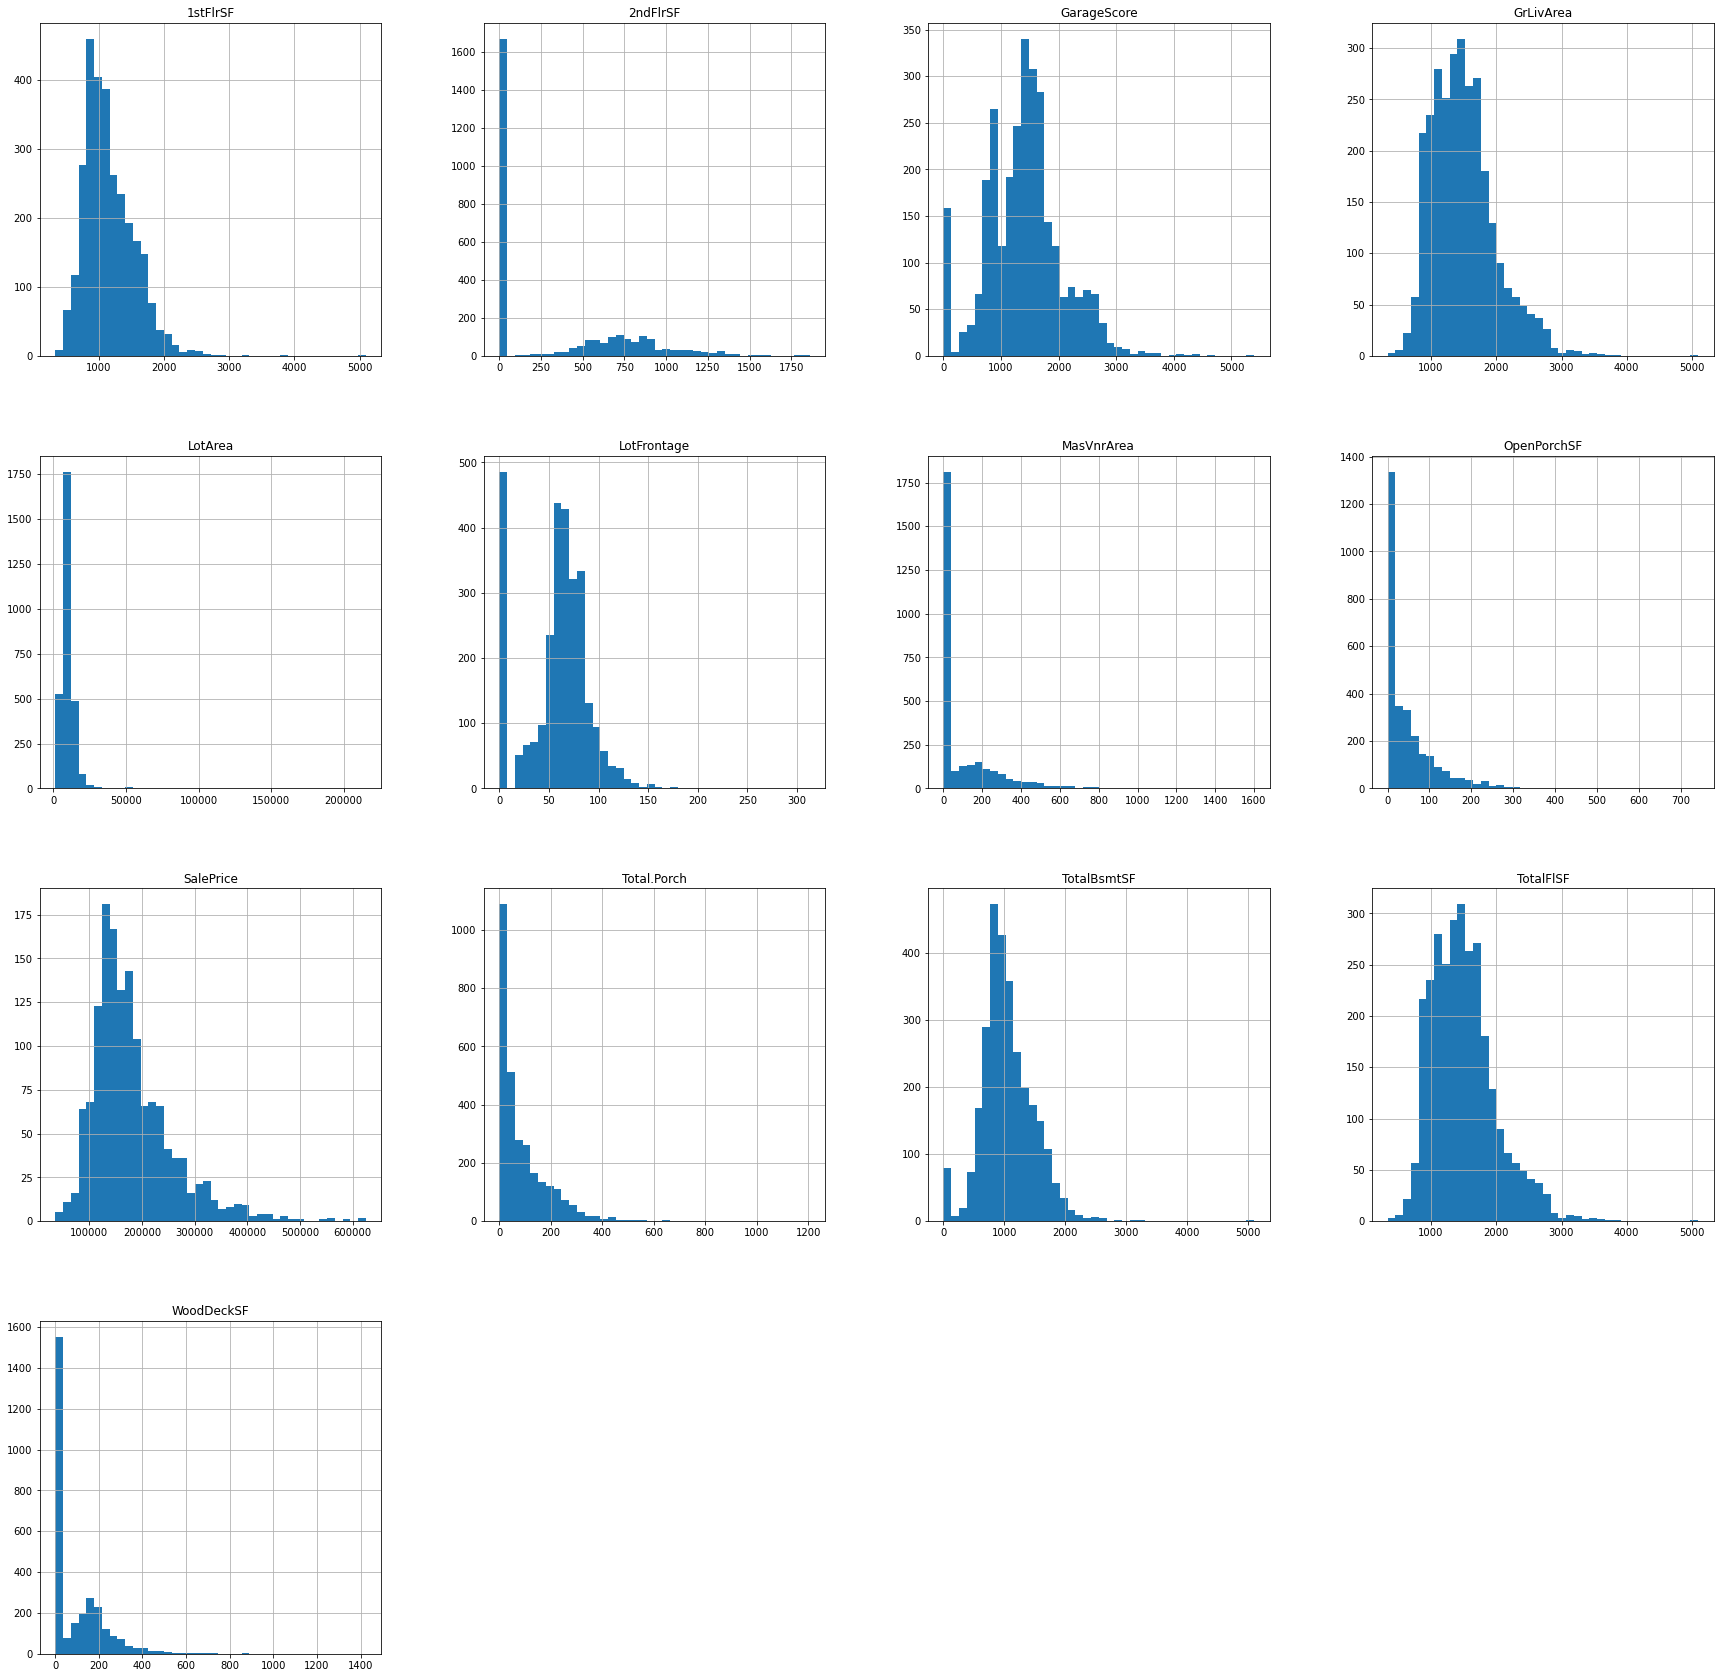

In [105]:
numerical_log = ['1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageScore', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'SalePrice',\
                 'Total.Porch', 'TotalBsmtSF', 'TotalFlSF', 'WoodDeckSF']
df[numerical_log].hist(bins = 40, figsize = (30, 30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000283D505ECA0>,
      dtype=object)

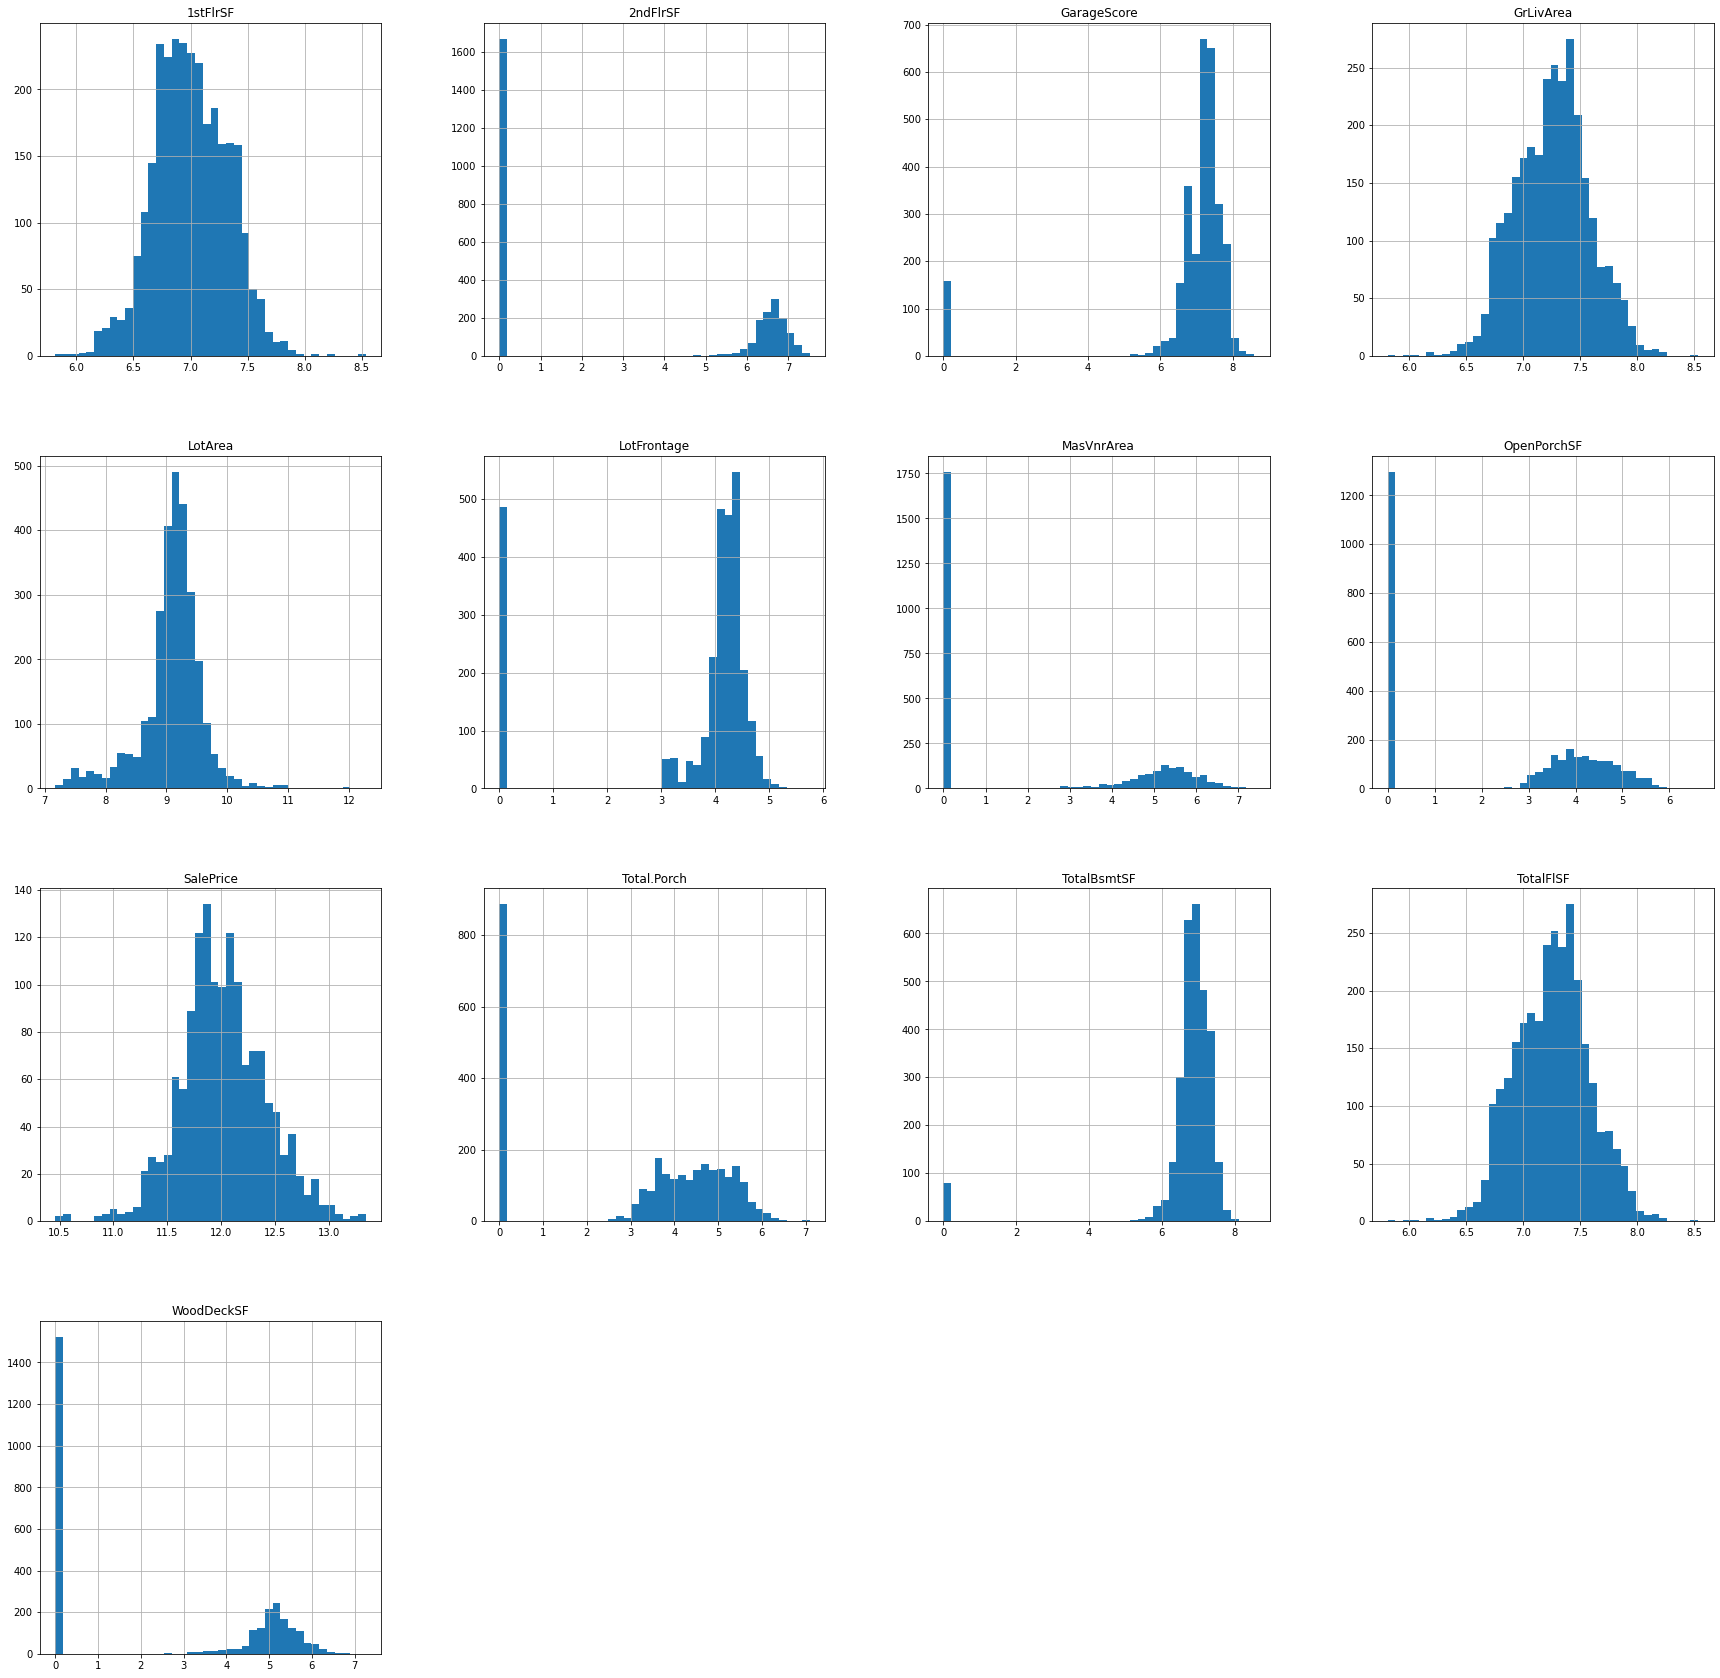

In [106]:
# df['LogGarageArea'] = df['GarageArea'].apply(lambda x: np.log1p(x))
# df['LogGarageArea'].hist(bins = 40, figsize = (10, 10))

# df['LogLotArea'] = df['LotArea'].apply(lambda x: np.log1p(x))
# df['LogLotArea'].hist(bins = 40, figsize = (10, 10))

# df['LogBsmtFinSF1'] = df['BsmtFinSF1'].apply(lambda x: np.log1p(x))
# df['LogBsmtFinSF1'].hist(bins = 40, figsize = (10, 10))

# df['GarageScore'] = df['GarageScore'].apply(lambda x: np.log1p(x))
# df['GarageScore'].hist(bins = 40, figsize = (10, 10))


df[numerical_log] = df[numerical_log].apply(lambda x: np.log1p(x))
df[numerical_log].hist(bins = 40, figsize = (30, 30))

In [107]:
numerical = df[numerical_features]
dummified_categorical = df[categorical_features]
dummified_categorical = pd.get_dummies(dummified_categorical, drop_first=True)

df_train = pd.concat([numerical, dummified_categorical], axis = 1)

In [108]:
df_train

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,4.189655,9.042040,7,5,2003,2003,5.283204,4,3,...,0,0,0,0,1,0,0,0,1,0
1,2,4.394449,9.169623,6,8,1976,1976,0.000000,3,3,...,0,0,0,0,1,0,0,0,1,0
2,3,4.234107,9.328212,7,5,2001,2002,5.093750,4,3,...,0,0,0,0,1,0,0,0,1,0
3,4,4.110874,9.164401,7,5,1915,1970,0.000000,3,3,...,0,0,0,0,1,0,0,0,0,0
4,5,4.442651,9.565284,8,5,2000,2000,5.860786,4,3,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,3.091042,7.568896,4,7,1970,1970,0.000000,3,3,...,0,0,0,0,1,0,0,0,1,0
1455,2916,3.091042,7.546974,4,5,1970,1970,0.000000,3,3,...,0,0,0,0,1,0,0,0,0,0
1456,2917,5.081404,9.903538,5,7,1960,1996,0.000000,3,3,...,0,0,0,0,1,0,0,0,0,0
1457,2918,4.143135,9.253591,5,5,1992,1992,0.000000,3,3,...,0,0,0,0,1,0,0,0,1,0


In [109]:
#splitting sets back before standardising and training the model
df_final_train = df_train.loc[df_train['Id'] <= 1460].drop('Id', axis=1)
df_final_test = df_train.loc[df_train['Id'] > 1460].drop(['SalePrice', 'Id'], axis=1)

In [110]:
df_final_test

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.394449,9.360741,5,6,1961,1961,0.000000,3,3,3,...,0,0,0,0,1,0,0,0,1,0
1,4.406719,9.565775,6,6,1958,1958,4.691348,3,3,3,...,0,0,0,0,1,0,0,0,1,0
2,4.317488,9.534668,5,5,1997,1998,0.000000,3,3,4,...,0,0,0,0,1,0,0,0,1,0
3,4.369448,9.208238,6,6,1998,1998,3.044522,3,3,3,...,0,0,0,0,1,0,0,0,1,0
4,3.784190,8.518392,8,5,1992,1992,0.000000,4,3,4,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3.091042,7.568896,4,7,1970,1970,0.000000,3,3,3,...,0,0,0,0,1,0,0,0,1,0
1455,3.091042,7.546974,4,5,1970,1970,0.000000,3,3,3,...,0,0,0,0,1,0,0,0,0,0
1456,5.081404,9.903538,5,7,1960,1996,0.000000,3,3,3,...,0,0,0,0,1,0,0,0,0,0
1457,4.143135,9.253591,5,5,1992,1992,0.000000,3,3,4,...,0,0,0,0,1,0,0,0,1,0


In [111]:
df_final_test.isnull().sum()[df_final_test.isnull().sum() > 0]
df_final_test.isnull().sum()[df_final_test.isnull().sum() > 0]

Series([], dtype: int64)

In [112]:
df_final_train.to_csv('final_train.csv')
df_final_test.to_csv('final_test.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000283D15DAEE0>,
      dtype=object)

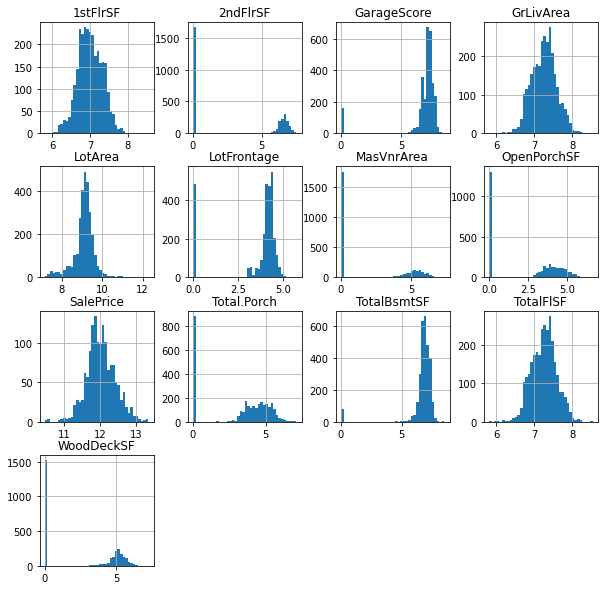

In [113]:
df
numerical_log = ['1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageScore', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'SalePrice',\
                 'Total.Porch', 'TotalBsmtSF', 'TotalFlSF', 'WoodDeckSF']

df[numerical_log].hist(bins = 40, figsize = (10, 10))